In [2]:
import numpy as np
import pandas as pd

In [3]:
positive = pd.read_csv('/workspaces/flare_cme_association/Bobra et al. 2016/Data 2016/positive24.csv')
positive["CME"] = 1
negative = pd.read_csv('/workspaces/flare_cme_association/Bobra et al. 2016/Data 2016/negative24.csv')
negative["CME"] = 0

In [4]:
data = pd.concat([positive, negative], ignore_index=True)

In [5]:
data

,Unnamed: 0,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,...,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,HARPNUM,NOAA,Class,Peak Time,CME
0,0,2.246101e+22,107.736,0.021724,15533.100,54.882,2975.118,77.983,0.041413,59.541,...,7.077275e+23,50.329,945.314636,4.805,745.287,377,11158,X2.2,2011.02.14_01:56_TAI,1
1,1,2.235615e+22,93.863,-0.001943,10914.060,44.178,1636.710,56.639,-0.003942,50.680,...,4.733711e+23,43.479,961.502686,4.303,63.441,401,11166,M2.0,2011.03.06_14:30_TAI,1
2,2,6.039302e+22,91.233,0.007535,9912.353,29.044,4229.148,49.560,0.015028,41.150,...,1.074422e+24,35.873,1934.446167,4.865,615.008,393,11164,M3.7,2011.03.06_20:12_TAI,1
3,3,2.384940e+22,109.706,0.009620,3703.910,13.500,1505.331,47.602,0.030907,34.321,...,1.879337e+23,28.525,970.551636,3.971,367.530,637,11226,M2.5,2011.06.06_06:41_TAI,1
4,4,1.989983e+22,109.891,0.032849,12062.610,44.090,2547.054,73.681,0.079865,53.270,...,5.269515e+23,43.929,1259.099854,4.777,1080.528,750,11261,M6.0,2011.08.02_13:48_TAI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,359,5.699735e+22,82.488,0.001285,3897.788,12.100,2835.275,37.319,0.003836,31.916,...,4.489937e+23,26.183,1631.551880,4.462,111.481,5637,12360,M1.3,2015.06.12_07:29_TAI,0
418,360,5.030321e+22,84.406,-0.010059,18649.460,51.975,3790.262,56.851,-0.014943,53.730,...,1.586148e+24,47.933,1852.075806,4.995,644.160,5692,12371,M1.0,2015.06.19_06:48_TAI,0
419,361,5.012767e+22,79.442,-0.011058,17702.280,57.464,3866.555,55.125,-0.019343,56.835,...,1.704056e+24,50.868,1849.319458,4.941,801.508,5692,12371,M2.7,2015.06.20_02:34_TAI,0
420,362,4.341204e+22,109.424,0.005738,5334.497,18.022,2990.720,52.363,0.014466,36.470,...,4.428561e+23,31.039,1728.649536,4.532,358.677,5673,12367,M3.8,2015.06.20_09:44_TAI,0


## Plotting histograms to see the variability of the data

In [6]:
data = data.drop(['Unnamed: 0','HARPNUM','NOAA','Class','Peak Time'], axis=1)

In [7]:
X = data.drop(columns=['CME'])
y = data['CME']

In [22]:
def normalize_the_data(flare_data):
    flare_data = np.array(flare_data)
    n_elements = flare_data.shape[0]
    for j in range(flare_data.shape[1]):
        standard_deviation_of_this_feature = np.std(flare_data[:, j])
        median_of_this_feature = np.median(flare_data[:, j])
        for i in range(n_elements):
            flare_data[i, j] = (
                flare_data[i, j] - median_of_this_feature) / (standard_deviation_of_this_feature)
    return flare_data

xn = normalize_the_data(X)

In [23]:
columns = ['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH',
       'MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ',
       'SAVNCPP', 'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH','CME']

df = pd.concat([pd.DataFrame(xn), pd.DataFrame(y)], axis=1)
df.columns = columns

df

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,CME
0,-0.361271,0.708868,1.626609,1.082351,1.602005,-0.028934,1.868655,1.536226,1.781569,0.964028,0.323139,-0.134114,-0.162273,-0.010530,1.535525,-0.401767,0.109625,0.642224,1
1,-0.363872,-0.273857,-0.004034,0.079985,0.750572,-0.476353,0.038710,-0.002149,0.617159,-0.450827,0.466501,-0.469251,-0.578379,-0.211991,0.545610,-0.390856,-0.644234,-0.563734,1
2,0.579740,-0.460158,0.648996,-0.137393,-0.453238,0.390277,-0.568214,0.641263,-0.635162,-0.385765,-1.004429,0.381729,0.932714,0.304693,-0.553558,0.264898,0.199728,0.411804,1
3,-0.326828,0.848417,0.792612,-1.484673,-1.689661,-0.520272,-0.736085,1.179866,-1.532550,0.453746,-0.241045,-0.510651,0.206897,-0.457362,-1.615441,-0.384757,-1.142803,-0.025902,1
4,-0.424808,0.861522,2.393108,0.329229,0.743572,-0.172033,1.499820,2.840444,0.957507,0.832213,1.544518,-0.279376,1.444333,-0.165931,0.610641,-0.190279,0.067577,1.235153,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,0.495501,-1.079629,0.218371,-1.442600,-1.801022,-0.075683,-1.617706,0.261651,-1.848587,-1.309541,-0.444699,-0.010839,-0.686693,-0.232947,-1.953891,0.060750,-0.405462,-0.478767,0
418,0.329434,-0.943764,-0.563240,1.758625,1.370772,0.243561,0.056886,-0.375274,1.017955,-0.705929,-1.031715,0.195903,0.399660,0.744589,1.189272,0.209381,0.394950,0.463364,0
419,0.325079,-1.295399,-0.632082,1.553080,1.807386,0.269065,-0.091094,-0.524518,1.425978,-1.250010,-0.341121,0.337087,0.798753,0.845947,1.613418,0.207524,0.313858,0.741660,0
420,0.158479,0.828441,0.525163,-1.130823,-1.329966,-0.023719,-0.327897,0.622209,-1.250153,0.753094,-0.408018,0.029579,0.288394,-0.238223,-1.252135,0.126193,-0.300342,-0.041560,0


In [24]:
pos = df[df['CME'] == 1]
neg = df[df['CME'] == 0]

## ANALYSIS

In [25]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification

X = df.drop(columns=['CME'])
y = df['CME']

from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18
a = np.array(X)
b = np.array(y)

selector = SelectKBest(f_classif, k=N_features)
selector.fit(a,b)
scores = selector.scores_
print(scores)



[0.09261774 5.72579729 0.7381978  0.01219224 0.47418033 0.78099688
 3.13400978 1.80413204 0.02556041 8.41292418 0.14965466 0.3542363
 9.62621717 0.46061421 0.23030296 0.09553315 0.02773737 9.4816348 ]


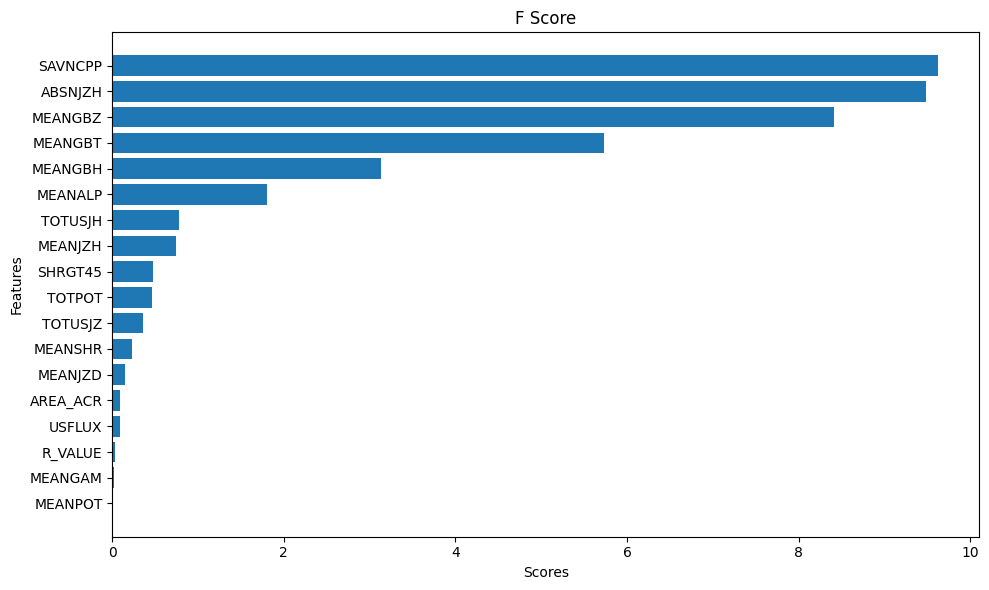

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X.columns
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()
ordered_features.append("CME")

In [27]:
df_reordered = df.loc[:, ordered_features]

In [28]:
df_reordered

,SAVNCPP,ABSNJZH,MEANGBZ,MEANGBT,MEANGBH,MEANALP,TOTUSJH,MEANJZH,SHRGT45,TOTPOT,TOTUSJZ,MEANSHR,MEANJZD,AREA_ACR,USFLUX,R_VALUE,MEANGAM,MEANPOT,CME
0,-0.162273,0.642224,0.964028,0.708868,1.868655,1.536226,-0.028934,1.626609,1.602005,-0.010530,-0.134114,1.535525,0.323139,-0.401767,-0.361271,0.109625,1.781569,1.082351,1
1,-0.578379,-0.563734,-0.450827,-0.273857,0.038710,-0.002149,-0.476353,-0.004034,0.750572,-0.211991,-0.469251,0.545610,0.466501,-0.390856,-0.363872,-0.644234,0.617159,0.079985,1
2,0.932714,0.411804,-0.385765,-0.460158,-0.568214,0.641263,0.390277,0.648996,-0.453238,0.304693,0.381729,-0.553558,-1.004429,0.264898,0.579740,0.199728,-0.635162,-0.137393,1
3,0.206897,-0.025902,0.453746,0.848417,-0.736085,1.179866,-0.520272,0.792612,-1.689661,-0.457362,-0.510651,-1.615441,-0.241045,-0.384757,-0.326828,-1.142803,-1.532550,-1.484673,1
4,1.444333,1.235153,0.832213,0.861522,1.499820,2.840444,-0.172033,2.393108,0.743572,-0.165931,-0.279376,0.610641,1.544518,-0.190279,-0.424808,0.067577,0.957507,0.329229,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,-0.686693,-0.478767,-1.309541,-1.079629,-1.617706,0.261651,-0.075683,0.218371,-1.801022,-0.232947,-0.010839,-1.953891,-0.444699,0.060750,0.495501,-0.405462,-1.848587,-1.442600,0
418,0.399660,0.463364,-0.705929,-0.943764,0.056886,-0.375274,0.243561,-0.563240,1.370772,0.744589,0.195903,1.189272,-1.031715,0.209381,0.329434,0.394950,1.017955,1.758625,0
419,0.798753,0.741660,-1.250010,-1.295399,-0.091094,-0.524518,0.269065,-0.632082,1.807386,0.845947,0.337087,1.613418,-0.341121,0.207524,0.325079,0.313858,1.425978,1.553080,0
420,0.288394,-0.041560,0.753094,0.828441,-0.327897,0.622209,-0.023719,0.525163,-1.329966,-0.238223,0.029579,-1.252135,-0.408018,0.126193,0.158479,-0.300342,-1.250153,-1.130823,0


In [29]:
pos = df_reordered[df_reordered['CME'] == 1]
neg = df_reordered[df_reordered['CME'] == 0]

In [30]:
min_a = pos.index.min()
max_a = pos.index.max()

pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)

min_b = neg.index.min()
max_b = neg.index.max()

neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)

/tmp/ipykernel_3253/2878712047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)
/tmp/ipykernel_3253/2878712047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)


In [33]:
ordered_features

['SAVNCPP',
 'ABSNJZH',
 'MEANGBZ',
 'MEANGBT',
 'MEANGBH',
 'MEANALP',
 'TOTUSJH',
 'MEANJZH',
 'SHRGT45',
 'TOTPOT',
 'TOTUSJZ',
 'MEANSHR',
 'MEANJZD',
 'AREA_ACR',
 'USFLUX',
 'R_VALUE',
 'MEANGAM',
 'MEANPOT',
 'CME']

In [34]:
column_name_exp = ['Sum of the modulus of the net current per polarity','Absolute value of the net current helicity','Mean gradient of vertical field','Mean gradient of total field','Mean gradient of horizontal field','Mean characteristic twist parameter, alpha','Total unsigned current helicity','Mean current helicity (B_z)','Fraction of Area with Shear > $45^0$','Total photospheric magnetic free energy density','Total unsigned vertical current','Mean shear angle','Mean vertical current density','Area of strong field pixels in the active region','Total unsigned flux','Sum of flux near polarity inversion line','Mean angle of field from radial','Mean photospheric magnetic free energy','CME' ]

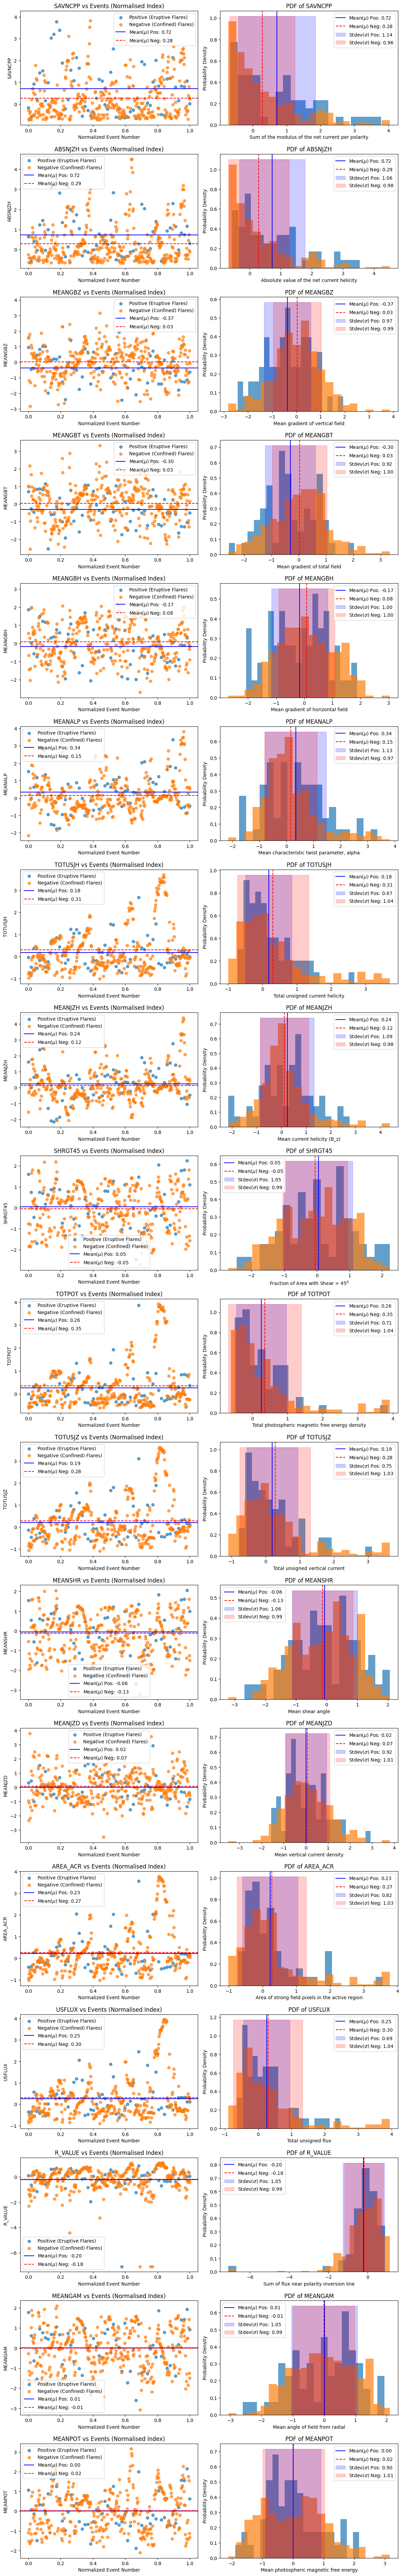

In [35]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
plt.figure(figsize=(12, 80))

for i in range(len(columns) - 1):
    mean_pos = np.mean(pos.iloc[:, i])
    mean_neg = np.mean(neg.iloc[:, i])
    std_pos = np.std(pos.iloc[:,i])
    std_neg = np.std(neg.iloc[:,i])

    plt.subplot(len(columns), 2, a)
    plt.scatter(pos["normalized_event_number"], pos.iloc[:, i], alpha=0.7, label="Positive (Eruptive Flares)")
    plt.scatter(neg["normalized_event_number"], neg.iloc[:, i], alpha=0.7, label="Negative (Confined) Flares)")
    plt.axhline(mean_pos, color='b', ls='-', label=f"Mean($\\mu$) Pos: {mean_pos:.2f}")
    plt.axhline(mean_neg, color='r', ls='--', label=f"Mean($\\mu$) Neg: {mean_neg:.2f}")
    plt.xlabel("Normalized Event Number")
    plt.ylabel(ordered_features[i])
    plt.title(f"{ordered_features[i]} vs Events (Normalised Index)")
    plt.legend()

    plt.subplot(len(columns), 2, a + 1)
    plt.hist(pos.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.hist(neg.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.axvline(mean_pos, color='b',ls='-', label=f"Mean($\\mu$) Pos: {mean_pos:.2f}")
    plt.axvline(mean_neg, color='r',ls='--', label=f"Mean($\\mu$) Neg: {mean_neg:.2f}")
    ymin, ymax = plt.ylim()
    plt.fill_betweenx([ymin, ymax], mean_pos - std_pos, mean_pos + std_pos, color='b', alpha=0.2,label=f'Stdev($\\sigma$) Pos: {std_pos:.2f}')
    plt.fill_betweenx([ymin, ymax], mean_neg - std_neg, mean_neg + std_neg, color='r', alpha=0.2, label=f'Stdev($\\sigma$) Neg: {std_neg:.2f}')
    plt.xlabel(column_name_exp[i])
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {ordered_features[i]}')
    plt.legend()

    a += 2

plt.tight_layout()
plt.savefig("2016_parameters_pdf.jpeg")
plt.show()